In this notebook we are going to see how to apply `LocalSearch` to an instance of the knapsack problem. This instance is very very simple, but I think it serves as an example.

The instance consists of 7 objects, with the `value` (the value of the object) and the `weight` (its weight) represented in the following pandas dataframe. In addition, the maximum capacity of the backpack is `50` and the optimal solution is `107`. 

In [24]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

from pyheuristics.combinatorial.trajectory.local_search import LocalSearch
from pyheuristics.combinatorial.utils.search_strategies import best_strategy, first_strategy

df = pd.read_csv("./data/knapsack_problem")
df

,value,weight
0,70,31
1,20,10
2,39,20
3,37,19
4,7,4
5,5,3
6,10,6


Our goal now is to obtain the optimal solution (if possible) using the `LocalSearch` algorithm. To achieve this, we must define, first of all, the list of values and weights, obtained from the pandas DataFrame.

In [25]:
LIST_OF_VALUES = df["value"].tolist()
LIST_OF_WEIGHTS = df["weight"].tolist()

In [26]:
print(f"Number of objects: {len(LIST_OF_VALUES)}")

Number of objects: 7


Now, we will create our class `KnapsackProblem` which inherits from `LocalSearch`. This new class must implent both `objective_fn` and `get_neighbors` abstractmethods. 

`objective_fn` simply receives as input a solution (a string, a graph, an array, whatever you want) and returns a negative float (**remember that pyheuristics minimizes objective functions,so that if we want to maximize one,we simply have to put a negative sign before &#x1F600;**)

`get_neighbors` receives as input a solution and returns a list of neighbors, that is, a list of candidate solutions.

Our implementation is pretty straightforward. `objective_fn` simply computes the some of the values of the objects that are inside the knapsack. `get_neighbors` is a bit trickier, since we are applying a binomial mask to randomly flip ones to zeroes or viceversa from our solution arrays. 

In [27]:
class KnapsackProblem(LocalSearch):
    """
    Implementation of Knapsack problem as in Wikipedia example: https://en.wikipedia.org/wiki/Knapsack_problem
    """
    TOTAL_CAPACITY = 50

    # We treat each solution as an array of booleans. 1 means the object is inside the knapsack, 0 that it isn't

    def fn(self, sol):
        total_value = 0
        for index, in_bag in enumerate(sol):
            total_value += LIST_OF_VALUES[index] * in_bag
        return -total_value

    def get_total_weight(self, sol):
        total_weight = 0
        for index, in_bag in enumerate(sol):
            total_weight += LIST_OF_WEIGHTS[index] * in_bag
        return total_weight

    def move(self):
        neighbors = []
        
        for i in range(10):
            neighbor = deepcopy(self.sol)
            
            mask = np.random.binomial(1, 0.2, size=(len(LIST_OF_VALUES))).astype('bool')
            neighbor[mask] += 1
            neighbor[mask] %= 2
            
            if self.get_total_weight(neighbor) <= self.TOTAL_CAPACITY:
                neighbors.append(neighbor)
                
        return best_strategy(self.fn, self.sol, self.cost, neighbors)

Generate an initial solution that only has one object inside the knapsack (the one that has a value of 37). This solution is valid (it does not exceed the 50 maximum capacity limit).

In [28]:
init_sol = np.array([0, 0, 0, 1, 0, 0, 0])

In [29]:
init_sol

array([0, 0, 0, 1, 0, 0, 0])

Now, instantiate the class with the defaults (`first` search strategy).

In [30]:
knapsack = KnapsackProblem(init_sol=init_sol)

In [31]:
result = knapsack.run(max_iter=100, history=True, verbose=1)

Iteration: 1 | Current solution cost: -86 | Best solution cost: -86
Iteration: 2 | Current solution cost: -96 | Best solution cost: -96


In [32]:
result

ExecutionResult(sol=array([0, 1, 1, 1, 0, 0, 0]), cost=-96, history=[-37, -86, -96])

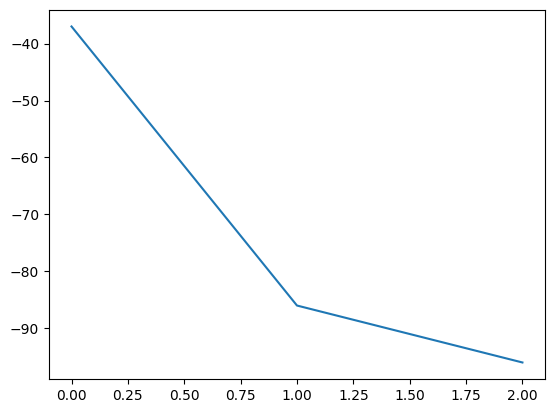

In [33]:
plt.plot(result.history)

`LocalSearch` has achieved a minimum of -105 (a maximum of 105). Close, but not the optimum. If we search our strategy to `best`, we can see that the algorithm finds the optimum in the first iteration.